In [1]:
from pony.orm import *
import pandas as pd

In [2]:
db = Database()
db.bind(provider='postgres', user='reader', password='A8Ap5Wx6bhFhajpqNIQ1', host='reader.cq05qytbcq26.us-west-1.rds.amazonaws.com', database='django', port=5432)


In [3]:
data = db.select("select id, content from contents_metacontent where id = 3 or id = 4")
data

[(3, '測試測試測試一直'),
 (4,
  '司徒氏SotoShee ( 1896-1992 )   \n1924年的夏天，28岁的司徒氏,与先生林利，7个月大的儿子，还有腹中的女儿于6月 17日从香港出发，在海上一个月之久，于7月 23日到达美国旧金山。  \n她的先生林利已在加州住了几年，而且已经是美国合法公民，可以入境，可是司徒氏是第一次来美，被拒绝入境，送往天使岛，等候遣返，当时他们的儿子跟著司徒氏。\n天使岛女营房条件很糟，很多人生病，包括司徒氏的儿子，两周半后死去，被送回父亲林利家中。Joseph Fallon帮助司徒氏上诉参加儿子的葬礼，可是被拒。 \n很多妇女说天使岛的营房像监狱，每天早上六点起床，门窗紧闭，所有的书信都会被检查，她们不能和家人见面。这时的司徒氏，完全放弃了希望。九月的一天晚上，她准备自尽，被人发现，救下了她和女儿。\n又过了两个月，司徒氏终于得到了释放，可以和先生团聚。1925年2月，他们的女儿出生了，名为“Mabel”，中文姓名“美好”（将来生活美好的希望）。后来五年，他们全家住在旧金山的中国城。直到1930年10月，司徒氏才成为美国合法居留人。\n司徒氏和先生林利在美国一共有八个儿女，他们都是在美国出生的公民。在女儿美好高中毕业后，司徒氏全家搬到Marysville，开了一家中餐馆。十年以后，又回到了旧金山。林利在1961年去世，司徒氏又独自生活了31年，她有22个孙子女和9个曾孙子女。她爱每一个孩子。\n司徒氏活到96岁，但从未提起过天使岛。她1992去世，几个月以后，她的这段“天使岛拘留”的故事才得以公开。')]

In [ ]:
# with db_session:
#     title = "測試測試"
#     content = "測試測試"
#     db.execute("insert into contents_metacontent (title, content) values ($title, $content)")

In [4]:
# df = pd.read_csv("pondlet_STB_HSK3_20220614_new_with_review_label.csv")
# df = pd.read_csv("pondlet_STB_HSK3_20220429_new.csv")
df = pd.read_csv("pondlet_gloss-2022-all.csv")
pondlet_ids = df.loc[:, "ID"].to_list()

In [5]:
pondlet_ids[0]
metacontent_ids = [int(p.split("_")[-1]) for p in pondlet_ids]

In [6]:
metacontent_ids[:5]

[2939, 28058, 28059, 1897, 2181]

In [7]:
content_list = []
for metacontent_id in metacontent_ids[:]:
    data = db.select("select content from contents_metacontent where id = $metacontent_id")
    content_list.append(data[0].replace("\n", "").strip())

In [9]:
df["content"] = content_list
df.head()

,Label,ID,Length,0,1,2,3,4,5,6,None,content
0,Lv.3,Pondlet_0431_002939,453,0,0,0,0,0,0,0,0,人生是由生、老、病、死四个部分组成的。“生”是出生，是人一生的开始，所以特别重要，因此，只要...
1,Lv.3,Pondlet_0897_028058,401,32,15,18,20,15,6,0,30,中医是中国的传统医学，已有好几千年的历史。中医和中国画、京剧，被誉为中国三大国粹。神农氏是中...
2,Lv.3,Pondlet_0897_028059,401,32,15,18,20,15,6,0,30,中醫是中國的傳統醫學，已有好幾千年的歷史。中醫和中國畫、京劇，被譽為中國三大國粹。神農氏是中...
3,Lv.1,Pondlet_0263_001897,144,28,8,2,1,0,0,0,3,王亚伦:下班以后你去哪儿？ 东方圣:我准备跟朋友一起去打篮球。 王亚伦:你篮球打得怎么样？东...
4,Lv.1,Pondlet_0270_002181,115,21,15,3,1,0,0,0,5,東方聖：可可，你的襯衫是新買的嗎？陸可可：是啊，週末我跟朋友去逛街，買了一件襯衫、兩條裙子和...


In [10]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-chinese")

In [11]:
content_length = [len(tokenizer.tokenize(content)) for content in content_list]

Token indices sequence length is longer than the specified maximum sequence length for this model (643 > 512). Running this sequence through the model will result in indexing errors


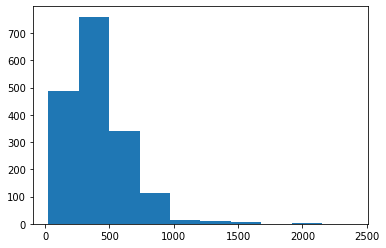

In [12]:
import matplotlib.pyplot as plt

plt.hist(content_length)
plt.show()

In [13]:
content_length_over510 = len([length for length in content_length if length > 510])

In [14]:
content_length_over510, len(content_length)

(467, 1735)

In [15]:
new_df = df.loc[:, ["Label", "Length", "content"]]
new_df.head()

,Label,Length,content
0,Lv.3,453,人生是由生、老、病、死四个部分组成的。“生”是出生，是人一生的开始，所以特别重要，因此，只要...
1,Lv.3,401,中医是中国的传统医学，已有好几千年的历史。中医和中国画、京剧，被誉为中国三大国粹。神农氏是中...
2,Lv.3,401,中醫是中國的傳統醫學，已有好幾千年的歷史。中醫和中國畫、京劇，被譽為中國三大國粹。神農氏是中...
3,Lv.1,144,王亚伦:下班以后你去哪儿？ 东方圣:我准备跟朋友一起去打篮球。 王亚伦:你篮球打得怎么样？东...
4,Lv.1,115,東方聖：可可，你的襯衫是新買的嗎？陸可可：是啊，週末我跟朋友去逛街，買了一件襯衫、兩條裙子和...


In [130]:
# new_df.to_csv("pondlet_STB_HSK3_20220714_content_data_org_label.csv", index=False)

In [131]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

new_df.drop(new_df[new_df.Label == "Lv.7-9"].index, inplace=True, axis=0)


# X = new_df.iloc[:, 1:].to_numpy()

# le = preprocessing.LabelEncoder()
# le.fit(new_df.Label)
# new_df['categorical_label'] = le.transform(new_df.Label)
# y = new_df.iloc[:, -1].to_numpy()


# # ['Lv.1' 'Lv.2' 'Lv.3' 'Lv.4' 'Lv.5' 'Lv.6']
# print(le.classes_)


# X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)


In [132]:
df_train, df_test = train_test_split(new_df, test_size=0.1, stratify=new_df.Label, random_state=42)
df_train = df_train.rename(columns = {'Label':'labels'})
df_test = df_test.rename(columns = {'Label':'labels'})

In [133]:
df_train.to_csv("pondlet_STB_HSK3_20220714_content_data_train_org_label.csv", index=False)
df_test.to_csv("pondlet_STB_HSK3_20220714_content_data_test_org_label.csv", index=False)